<a href="https://colab.research.google.com/github/the-faisalahmed/Optimization/blob/main/Set_Covering_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
import sys
import os

if 'google.colab' in sys.modules:
    !pip install idaes-pse --pre
    !idaes get-extensions --to ./bin
    os.environ['PATH'] += ':bin'

!pip install pyomo
from pyomo.environ import *
from pyomo.opt import SolverFactory
from pyomo.util.infeasible import log_infeasible_constraints
from pyomo.opt import SolverStatus
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import random
from pyomo.contrib.latex_printer import latex_printer
import networkx as nx

Find the smallest set of nodes ($N$) such that each edge ($E$) in the graph is incident to at least one node in the set.

\begin{aligned}
& \text{minimize} & & \sum_{i \in N} X_{i} \\
& \text{subject to} & &  X_{i} + X_{j} \geq 1 \quad & \forall (i, j) \in E \\
& & & X_{ij} \in \{0,1\}
\end{aligned}

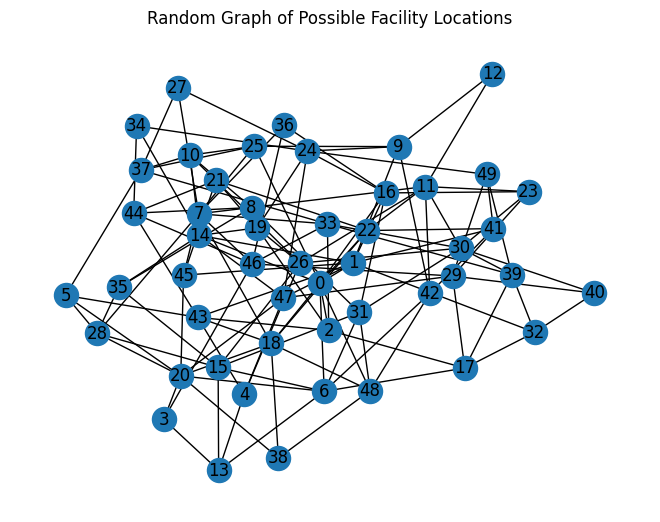

In [ ]:
seed = 123
random.seed(seed)
np.random.seed(seed)

G = nx.gnp_random_graph(50, .1, seed=seed, directed=False)

my_pos = nx.spring_layout(G, seed = seed)

nx.draw(G, pos = my_pos, with_labels = 'True')
plt.title('Random Graph of Possible Facility Locations')
plt.show()

In [ ]:
nx.is_connected(G)

True

In [ ]:
nodes = list(G.nodes)

cost = {}
for i in nodes:
  cost[i] = random.randrange(10,30)

#cost

In [ ]:
connections = {}
edges = list(G.edges)

for i in nodes:
  for j in nodes:
    if i == j:
      continue
    elif (i,j) in connections:
      continue
    elif (i,j) in edges:
      connections[i,j] = 1
      connections[j,i] = 1
    else:
      connections[i,j] = 0
      connections[i,j] = 0

#connections

In [ ]:
model = ConcreteModel()

model.I = nodes

model.x = Var(model.I, within = Binary)
model.a = Param(model.I, model.I, initialize = connections)
#model.c = Param(model.I, initialize = cost)

def cons_rule1(model,i):
  return sum(model.a[i,j] * model.x[j] for j in model.I if i != j) >= 1

model.cons1 = Constraint(model.I, rule = cons_rule1)

model.obj = Objective(expr = sum(model.x[i] for i in model.I), sense = minimize)

In [ ]:
# Solve model
opt = SolverFactory('cbc')
result = opt.solve(model)

if (result.solver.status == SolverStatus.ok) and \
    (result.solver.termination_condition == TerminationCondition.optimal):
    # Do something when the solution in optimal and feasible
    print('Solution is Optimal')
elif (result.solver.termination_condition == TerminationCondition.infeasible):
    # Do something when model in infeasible
    print('Solution is Infeasible')
else:
        # Something else is wrong
    print("Solver Status:",  result.solver.status)

# Solve time
print('Solve Time: ', result.solver.wallclock_time)

Solution is Optimal
Solve Time:  0.01


In [ ]:
solution = model.x.extract_values()

In [ ]:
node_color = []

for i in solution:
  if solution[i] == 0.0:
    node_color.append('#1f78b4')
  else:
    node_color.append('red')

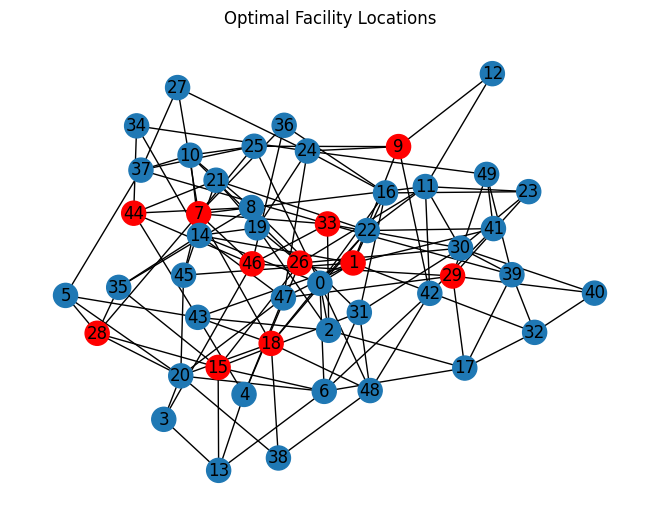

In [ ]:
nx.draw(G, pos = my_pos, node_color = node_color, with_labels = 'True')
plt.title('Optimal Facility Locations')
plt.show()